In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import copy
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import pandas as pd
import toml
import h5py
from qd_analysis.fig import setup_plotting_env
from markovids import vid

In [3]:
config = toml.load("../preprocessing/config.toml")
fig_dir = config["dirs"]["figs"]
os.makedirs(fig_dir, exist_ok=True)
vid_dir = "/storage/home/hcoda1/4/jmarkowitz30/shared_folder/active_lab_members/markowitz_jeffrey/active_projects/quantum_dots/photobleaching_slides/session_20241021122909-449662 (system76-pc)/"

In [4]:
avis = sorted(glob.glob(os.path.join(vid_dir, "*.avi")))

In [5]:
use_file = avis[0]

In [6]:
reader = vid.io.AutoReader(use_file)

In [7]:
tstamps_file = os.path.splitext(use_file)[0] + ".txt"

In [8]:
tstamps = vid.io.read_timestamps(tstamps_file)

In [9]:
zero_time = tstamps["system_timestamp"].diff().cumsum()

In [10]:
_test = reader.get_frames()

In [11]:
reader.close()

In [12]:
roi_y = slice(560,570)
roi_x = slice(470,483)

In [13]:
blank_y = slice(650,660)
blank_x = slice(550,565)

In [15]:
ctrl_trace = _test[1:,blank_y,blank_x].max(axis=(1,2))
roi_trace = _test[1:,roi_y,roi_x].max(axis=(1,2))
xvec = zero_time[1:] / 3600

In [16]:
setup_plotting_env()

In [17]:
_test_norm = _test.copy().astype("float32")

In [18]:
corrs = []
for i in range(len(_test)):
    corrs.append(np.abs(_test[i,roi_y,roi_x] - _test[-50:,roi_y,roi_x].mean(axis=0, keepdims=False)).mean())

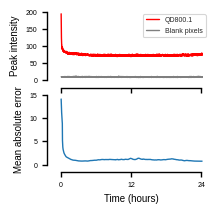

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(2,2), sharex=True)
ax[0].plot(xvec, roi_trace, color="r", label="QD800.1")
ax[0].plot(xvec, ctrl_trace, color="k", alpha=.5, label="Blank pixels")
ax[0].set_ylabel("Peak intensity")
ax[0].legend()
ax[0].set_xticks([0,12,24])
ax[1].plot(zero_time / 3600, pd.Series(corrs).rolling(50,1,True).mean())
ax[1].set_ylim(0,15)
ax[1].set_xlabel("Time (hours)")
ax[1].set_ylabel("Mean absolute error")
sns.despine(offset=5, trim=True)
fig.savefig(os.path.join(fig_dir, "qd_photobleaching.pdf"), bbox_inches="tight")